In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from random import sample

link = ("https://github.com/dnllvrvz/Social-Network-Dataset/"
        "raw/master/Social%20Network%20Dataset.xlsx")

network_data = pd.read_excel(link, sheet_name=['Elements', 'Connections'])
elements_data = network_data['Elements'] # node list
connections_data = network_data['Connections'] # edge list
edge_cols = ['Type', 'Weight', 'When']
graph = nx.convert_matrix.from_pandas_edgelist(connections_data,
                                               source='From',
                                               target='To',
                                               edge_attr=edge_cols)

node_dict = elements_data.set_index('Label').to_dict(orient='index')
nx.set_node_attributes(graph, node_dict)

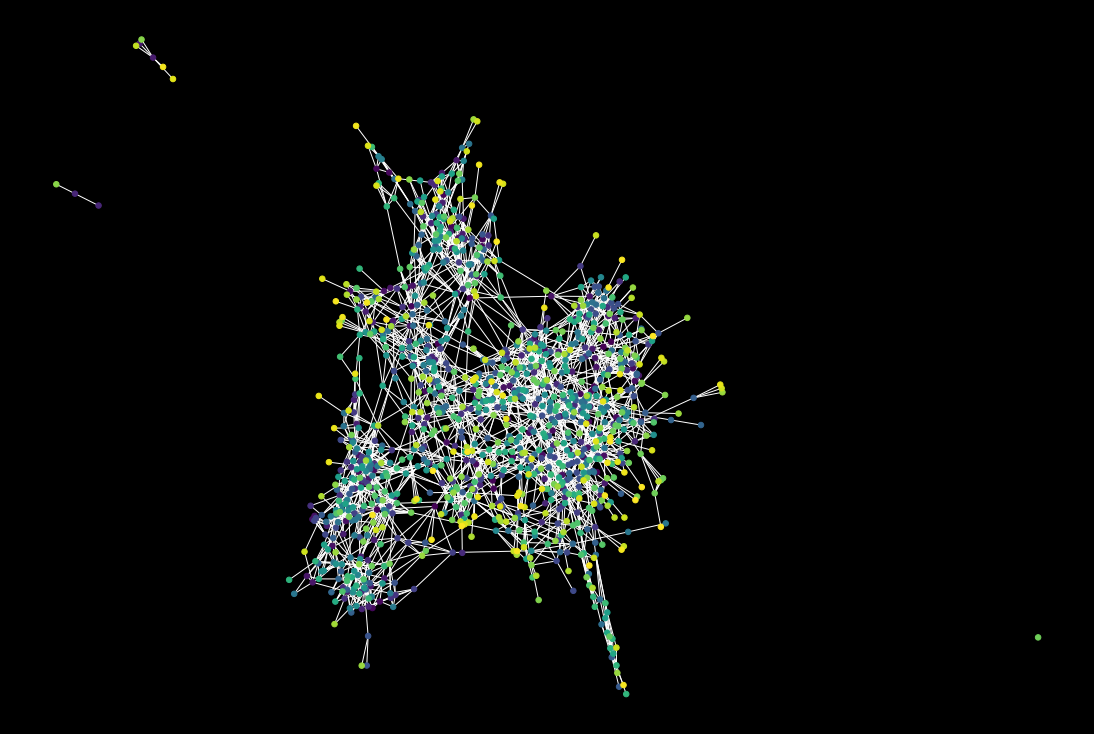

In [2]:
fig = plt.figure(figsize=(15, 10))
colors = np.linspace(0, 1, len(graph.nodes))
nx.draw(graph, 
        node_size=30,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('black')

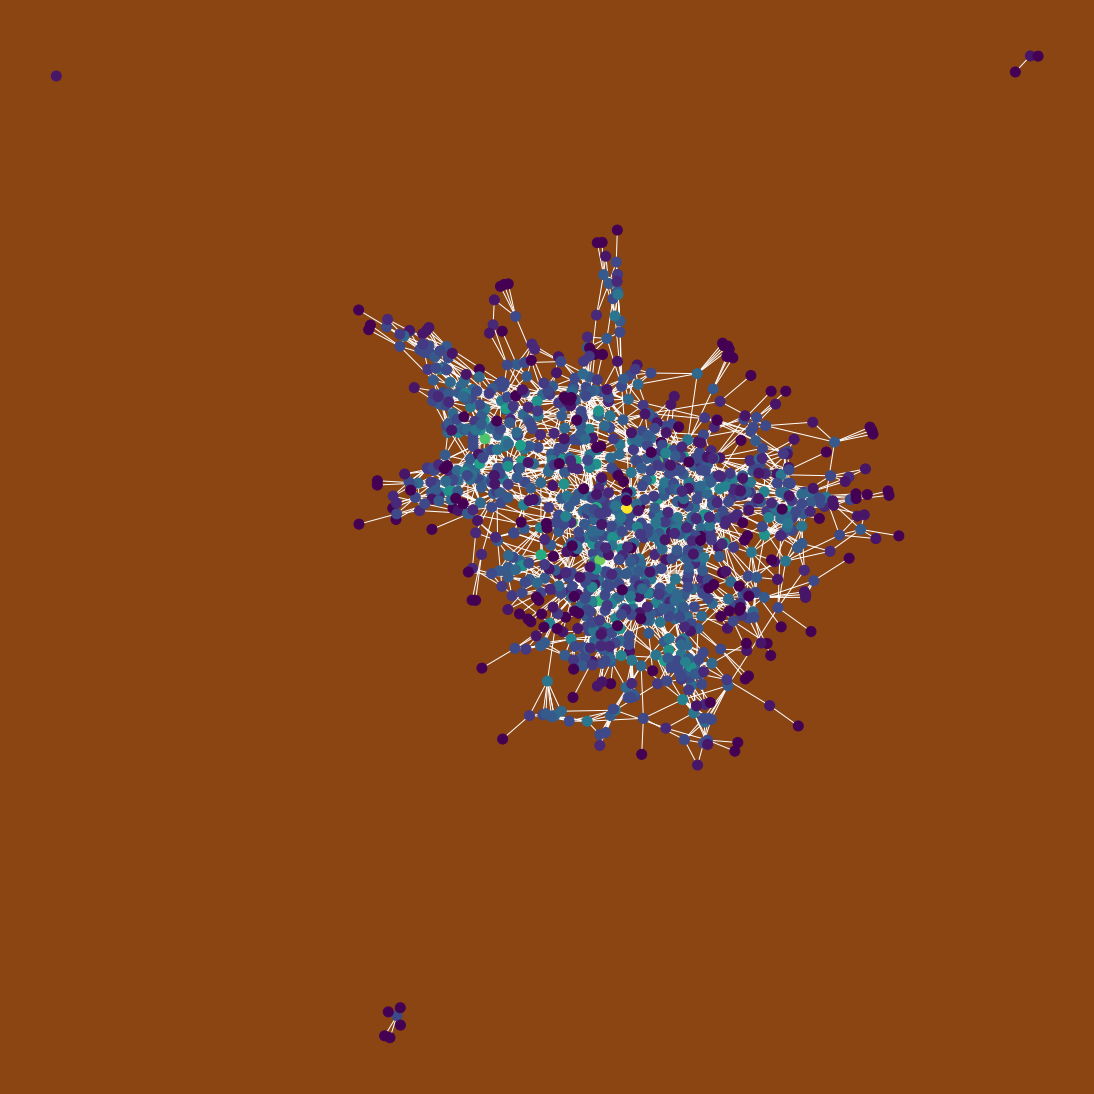

In [5]:
fig = plt.figure(figsize=(15, 15))

centrality = nx.degree_centrality(graph)
#Birghter color nodes has more centrality. 
colors = list(centrality.values())

nx.draw(graph, 
        node_size=100,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('SaddleBrown')

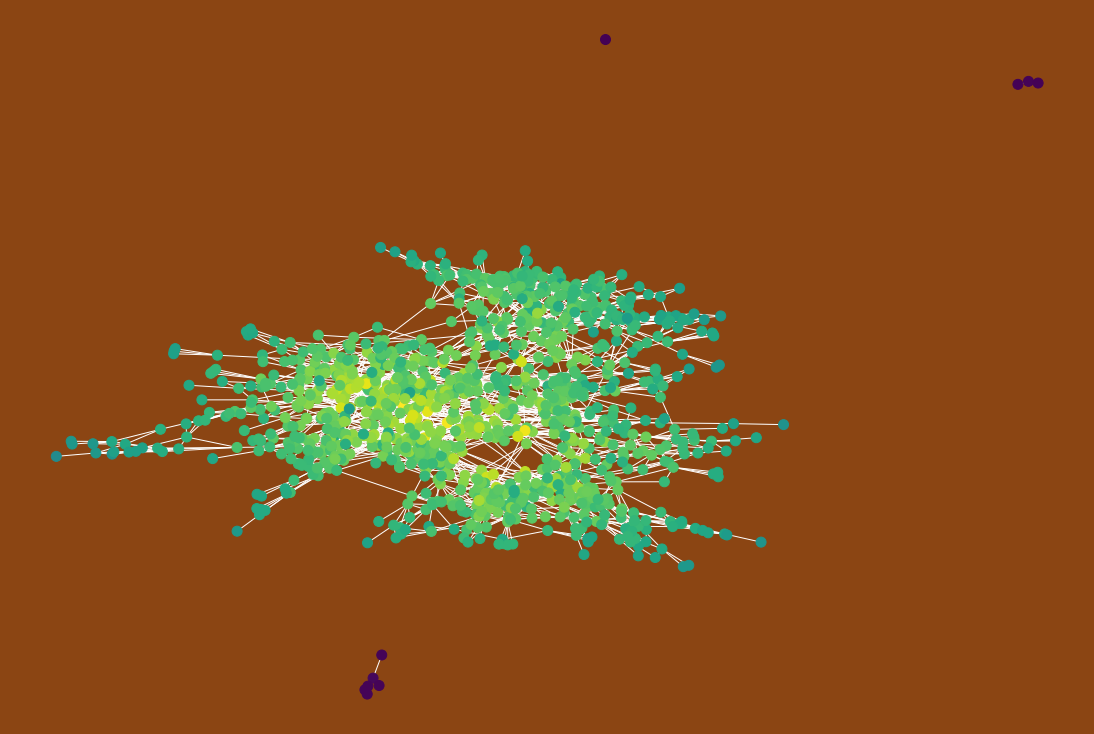

In [6]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.closeness_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=100,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('SaddleBrown')

In [7]:
sample(centrality.items(),10)

[('S-5e5aa0', 0.15325364704726066),
 ('S-aef13c', 0.15899130393617059),
 ('S-4bf0d6', 0.1504021420014692),
 ('S-6cb75f', 0.12673917523977613),
 ('S-a8313d', 0.1556345628226596),
 ('S-d5e5e9', 0.1874434499628098),
 ('S-e25b3a', 0.16540839579698696),
 ('S-4f865a', 0.1725174996493155),
 ('S-215ee5', 0.15416071190549122),
 ('S-1b9941', 0.18166210362948693)]

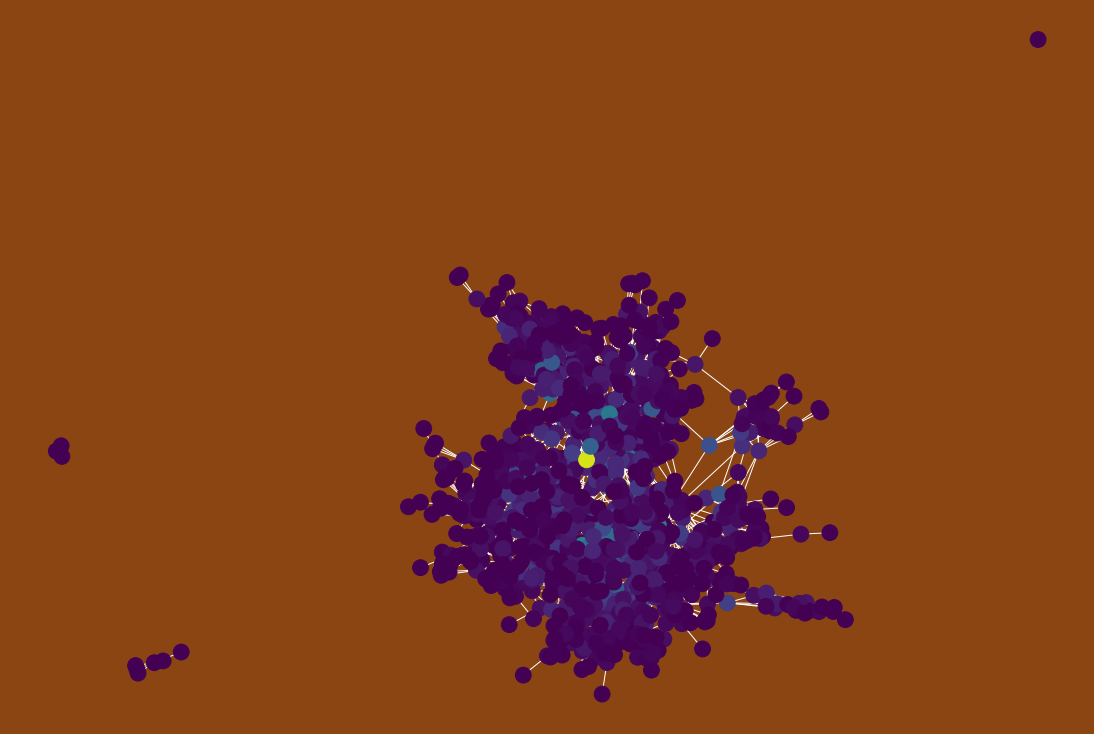

In [8]:
fig = plt.figure(figsize=(15, 10))
#Measures flow of connections through the node (betweenness_centrality)
centrality = nx.betweenness_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=250,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('SaddleBrown')

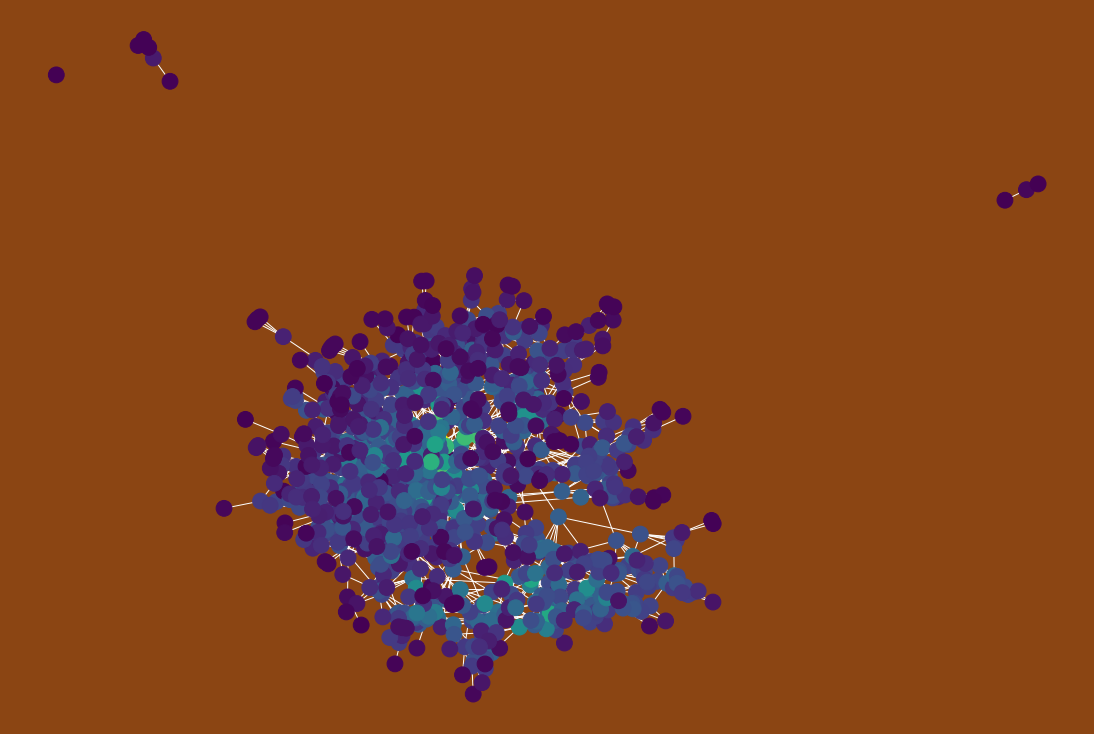

In [9]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.katz_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=250,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('SaddleBrown')